# Finencial Engineering Computational Project

## Yixiao Hong - 1001311145
## Hongzheng Xu - 1001772904

In [1]:
!pip install qpsolvers
#Import libraries needed for the project:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize
from qpsolvers import solve_qp
import warnings
warnings.filterwarnings("ignore")

  Created wheel for qpsolvers: filename=qpsolvers-1.3-cp36-none-any.whl size=17440 sha256=d05efb549bdbaae4c5c0d282d83803605db7a302d89477143d9a35c3c5910471
  Stored in directory: /root/.cache/pip/wheels/a3/00/88/2755bd079a831e8d1b38a3e0038cc9d41d0dc907dc97268ff4
  Created wheel for quadprog: filename=quadprog-0.1.7-cp36-cp36m-linux_x86_64.whl size=299693 sha256=b60a505ef52527ccef472e99d3865c7f497ddc12e053e7a44ce634be3e4911bb
  Stored in directory: /root/.cache/pip/wheels/36/dd/b1/849989444c0a5930927b260663019b7da6cff864fc224c2747
Successfully built qpsolvers quadprog


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# a) Problem A

## 1.0 Data Importing and Cleaning

In [2]:
stocksNameList = ['F','CAT','DIS','MCD','KO','PEP','WMT','C','WFC','JPM','AAPL','IBM','PFE','JNJ','XOM','MRO','ED','T','VZ','NEM']
print('Stock names:',stocksNameList)
#print(len(stocksNameList))

Stock names: ['F', 'CAT', 'DIS', 'MCD', 'KO', 'PEP', 'WMT', 'C', 'WFC', 'JPM', 'AAPL', 'IBM', 'PFE', 'JNJ', 'XOM', 'MRO', 'ED', 'T', 'VZ', 'NEM']


In [3]:
# create template for df
df =pd.read_csv('https://raw.githubusercontent.com/YixiaoHong/Finencial-Engineering-P1/master/data/AAPL.csv')
df_stock_price_full = df[['Date']]

for i in stocksNameList:
  path = 'https://raw.githubusercontent.com/YixiaoHong/Finencial-Engineering-P1/master/data/' + i +'.csv'
  df =pd.read_csv(path)
  df_stock_price_full[i] = df[['Adj Close']]
print ("size:", df_stock_price_full.shape)

size: (48, 21)


In [4]:
df_stock_price_full['Date'] = df_stock_price_full['Date'].astype('datetime64[ns]') 
display(df_stock_price_full)

,Date,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
0,2005-01-01,8.607593,28.674561,23.239105,20.590382,10.552325,35.125565,37.238281,437.080566,18.352392,24.607668,4.755152,62.059471,13.035284,41.500927,32.743988,6.852079,22.034508,10.387199,14.897937,33.243374
1,2005-02-01,8.330702,30.859501,22.679024,21.029022,10.885496,35.230228,36.676849,425.229126,17.777571,24.304571,5.547884,61.501465,14.184512,42.078224,40.174839,8.375353,21.471962,10.653401,15.219813,35.969017
2,2005-03-01,7.461411,29.687452,23.320276,19.795757,10.598103,34.687309,35.610874,400.811768,18.185806,23.007877,5.153373,60.820072,14.279902,43.265335,38.005806,8.487700,21.459938,10.489573,15.020938,33.770912
3,2005-04-01,5.999423,28.586847,21.429001,18.632418,11.193820,36.550690,33.598995,418.827728,18.228388,23.599710,4.459579,50.836479,14.769124,44.212318,36.366962,8.424388,22.019592,10.538280,15.147880,30.417458
4,2005-05-01,6.642731,30.841572,22.273172,19.668612,11.500459,36.957958,33.663162,420.558899,18.371319,24.010963,4.917161,50.284065,15.165947,43.226677,35.837692,8.771710,23.154150,10.492134,15.161038,29.832663
5,2005-06-01,6.815792,31.234846,20.438723,17.640724,10.758329,35.427357,34.464516,412.702881,19.030146,23.722153,4.552333,49.516693,15.095690,42.079090,36.834179,9.858621,24.133881,10.658173,14.805373,31.352509
6,2005-07-01,7.148591,35.334606,20.812099,19.814829,11.421812,35.988895,35.286800,388.331696,18.955980,23.601250,5.274571,55.696301,14.504559,41.405819,37.654568,10.780385,24.814003,10.972307,14.668242,30.163643
7,2005-08-01,6.697522,36.541264,20.446838,20.628532,11.484452,36.200085,32.147804,391.129791,18.424444,22.982948,5.798935,53.801048,13.946273,41.036823,38.391640,11.879480,24.169954,10.952836,14.200024,31.794313
8,2005-09-01,6.623626,38.688038,19.586428,21.289656,11.273030,37.427654,31.431786,406.767883,18.410175,23.010078,6.630004,53.662868,13.765078,41.177101,40.924217,12.959023,25.318768,10.902798,14.191338,37.891315
9,2005-10-01,5.589106,34.631557,19.781240,20.088177,11.309140,39.176384,33.935135,409.091125,18.922527,24.834333,7.122217,54.773315,11.984496,40.747635,36.158108,11.310238,23.728195,10.848213,13.679079,34.304070


In [5]:
#we only keep the data from Dec-30-2004 to Sep-30-2008 (Oct-1-2008) as the sample
df_stock_price_sample_data = df_stock_price_full.iloc[:-2,:].copy()
print (df_stock_price_sample_data.shape)

(46, 21)


In [6]:
#compute the monthly return rate
df_monthly_r = df_stock_price_full.copy()
for row in range(47):
  for col in range(1,21):
    r = (df_monthly_r.iloc[row+1,col]-df_monthly_r.iloc[row,col])/df_monthly_r.iloc[row,col]
    df_monthly_r.iat[row,col] = r

#delete the last row+
df_monthly_r.drop(df_monthly_r.tail(1).index,inplace=True)

df_monthly_r_full_data = df_monthly_r.drop(columns=['Date'])

display(df_monthly_r_full_data)

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
0,-0.032168,0.076198,-0.024101,0.021303,0.031573,0.002980,-0.015077,-0.027115,-0.031321,-0.012317,0.166710,-0.008991,0.088163,0.013910,0.226938,0.222308,-0.025530,0.025628,0.021605,0.081991
1,-0.104348,-0.037980,0.028275,-0.058646,-0.026401,-0.015411,-0.029064,-0.057422,0.022963,-0.053352,-0.071110,-0.011079,0.006725,0.028212,-0.053990,0.013414,-0.000560,-0.015378,-0.013067,-0.061111
2,-0.195940,-0.037073,-0.081100,-0.058767,0.056210,0.053719,-0.056496,0.044949,0.002341,0.025723,-0.134629,-0.164150,0.034259,0.021888,-0.043121,-0.007459,0.026079,0.004643,0.008451,-0.099300
3,0.107228,0.078873,0.039394,0.055612,0.027394,0.011143,0.001910,0.004133,0.007841,0.017426,0.102607,-0.010866,0.026868,-0.022293,-0.014554,0.041228,0.051525,-0.004379,0.000869,-0.019226
4,0.026053,0.012751,-0.082361,-0.103103,-0.064530,-0.041415,0.023805,-0.018680,0.035862,-0.012028,-0.074195,-0.015261,-0.004633,-0.026548,0.027806,0.123911,0.042313,0.015825,-0.023459,0.050946
5,0.048828,0.131256,0.018268,0.123244,0.061672,0.015850,0.023859,-0.059053,-0.003897,-0.005097,0.158652,0.124798,-0.039159,-0.016000,0.022272,0.093498,0.028181,0.029474,-0.009262,-0.037919
6,-0.063099,0.034149,-0.017550,0.041065,0.005484,0.005868,-0.088957,0.007205,-0.028041,-0.026198,0.099414,-0.034028,-0.038490,-0.008912,0.019575,0.101953,-0.025955,-0.001775,-0.031921,0.054061
7,-0.011033,0.058749,-0.042080,0.032049,-0.018409,0.033911,-0.022273,0.039982,-0.000774,0.001180,0.143314,-0.002568,-0.012992,0.003418,0.065967,0.090875,0.047531,-0.004568,-0.000612,0.191764
8,-0.156186,-0.104851,0.009946,-0.056435,0.003203,0.046723,0.079644,0.005711,0.027830,0.079281,0.074240,0.020693,-0.129355,-0.010430,-0.116462,-0.127231,-0.062822,-0.005007,-0.036097,-0.094672
9,-0.010683,0.103665,0.022979,0.071202,-0.002104,0.002031,0.026421,0.060507,0.044020,0.055025,0.177635,0.085735,-0.024838,-0.013893,0.033666,-0.014461,0.000879,0.058695,0.029302,0.082629


In [7]:
#Get the monthly return of Oct-2008
df_r_oct_2008 = df_monthly_r_full_data.iloc[[-2]].copy()
#Get the monthly return of Nov-2008
df_r_nov_2008 = df_monthly_r_full_data.iloc[[-1]].copy()
#Get the monthly return from Jan-2005 to Sep-2008
df_monthly_r_sample = df_monthly_r_full_data.iloc[:-2,:]
df_monthly_r_sample

,F,CAT,DIS,MCD,KO,PEP,WMT,C,WFC,JPM,AAPL,IBM,PFE,JNJ,XOM,MRO,ED,T,VZ,NEM
0,-0.032168,0.076198,-0.024101,0.021303,0.031573,0.002980,-0.015077,-0.027115,-0.031321,-0.012317,0.166710,-0.008991,0.088163,0.013910,0.226938,0.222308,-0.025530,0.025628,0.021605,0.081991
1,-0.104348,-0.037980,0.028275,-0.058646,-0.026401,-0.015411,-0.029064,-0.057422,0.022963,-0.053352,-0.071110,-0.011079,0.006725,0.028212,-0.053990,0.013414,-0.000560,-0.015378,-0.013067,-0.061111
2,-0.195940,-0.037073,-0.081100,-0.058767,0.056210,0.053719,-0.056496,0.044949,0.002341,0.025723,-0.134629,-0.164150,0.034259,0.021888,-0.043121,-0.007459,0.026079,0.004643,0.008451,-0.099300
3,0.107228,0.078873,0.039394,0.055612,0.027394,0.011143,0.001910,0.004133,0.007841,0.017426,0.102607,-0.010866,0.026868,-0.022293,-0.014554,0.041228,0.051525,-0.004379,0.000869,-0.019226
4,0.026053,0.012751,-0.082361,-0.103103,-0.064530,-0.041415,0.023805,-0.018680,0.035862,-0.012028,-0.074195,-0.015261,-0.004633,-0.026548,0.027806,0.123911,0.042313,0.015825,-0.023459,0.050946
5,0.048828,0.131256,0.018268,0.123244,0.061672,0.015850,0.023859,-0.059053,-0.003897,-0.005097,0.158652,0.124798,-0.039159,-0.016000,0.022272,0.093498,0.028181,0.029474,-0.009262,-0.037919
6,-0.063099,0.034149,-0.017550,0.041065,0.005484,0.005868,-0.088957,0.007205,-0.028041,-0.026198,0.099414,-0.034028,-0.038490,-0.008912,0.019575,0.101953,-0.025955,-0.001775,-0.031921,0.054061
7,-0.011033,0.058749,-0.042080,0.032049,-0.018409,0.033911,-0.022273,0.039982,-0.000774,0.001180,0.143314,-0.002568,-0.012992,0.003418,0.065967,0.090875,0.047531,-0.004568,-0.000612,0.191764
8,-0.156186,-0.104851,0.009946,-0.056435,0.003203,0.046723,0.079644,0.005711,0.027830,0.079281,0.074240,0.020693,-0.129355,-0.010430,-0.116462,-0.127231,-0.062822,-0.005007,-0.036097,-0.094672
9,-0.010683,0.103665,0.022979,0.071202,-0.002104,0.002031,0.026421,0.060507,0.044020,0.055025,0.177635,0.085735,-0.024838,-0.013893,0.033666,-0.014461,0.000879,0.058695,0.029302,0.082629


## 2.0 Parameter Estimation

### 2.1 Estimate the sample mean

In [8]:
#compute the sample mean for each stock (n=45)
r_sample_means = df_monthly_r_sample.mean(axis = 0) 
display(r_sample_means)

F      -0.024767
CAT     0.002276
DIS     0.000021
MCD     0.016395
KO      0.006798
PEP     0.004174
WMT     0.003744
C      -0.023051
WFC     0.009118
JPM     0.007839
AAPL    0.031563
IBM     0.003081
PFE    -0.001950
JNJ     0.001406
XOM     0.011410
MRO     0.019815
ED      0.004677
T       0.008135
VZ      0.002234
NEM    -0.004393
dtype: float64

### 2.2 Compute the sample variance

In [9]:
#sample variance for each stock
r_sample_std = df_monthly_r_sample.std(axis = 0, ddof=1)
r_sample_var = r_sample_std**2
display(r_sample_var) 

F       0.021957
CAT     0.007196
DIS     0.002523
MCD     0.002818
KO      0.002031
PEP     0.002249
WMT     0.002129
C       0.008495
WFC     0.005702
JPM     0.005632
AAPL    0.016221
IBM     0.004144
PFE     0.002892
JNJ     0.001277
XOM     0.003762
MRO     0.011952
ED      0.001452
T       0.003348
VZ      0.002610
NEM     0.009671
dtype: float64

### 2.3 Compute the sample covariance

In [10]:
#compute sample covariances
r_sample_cov = np.cov(df_monthly_r_sample.T)

display(r_sample_cov)

array([[ 2.19571849e-02,  5.98011908e-03,  3.26562149e-03,
         3.19291322e-03,  2.75749820e-03,  2.27921991e-03,
         2.74777161e-03,  8.78443030e-03,  3.15327152e-03,
         4.94759276e-03,  2.88076734e-03,  4.67733099e-03,
         1.58508508e-03,  1.85570584e-03,  2.94001642e-03,
         4.39637320e-03,  1.00835062e-03,  1.64008719e-03,
         2.44857244e-03,  3.68185030e-03],
       [ 5.98011908e-03,  7.19551082e-03,  2.32417253e-03,
         1.83091738e-03,  1.78325199e-03,  1.65086433e-03,
         3.79189396e-04,  2.92681749e-03, -2.40942317e-04,
         6.39006455e-04,  4.75301202e-03,  2.54405801e-03,
         1.19077051e-03,  6.81283528e-04,  2.19196643e-03,
         5.22967383e-03, -6.42331534e-05,  2.22480224e-03,
         2.10347191e-03,  3.90776114e-03],
       [ 3.26562149e-03,  2.32417253e-03,  2.52276056e-03,
         1.11835215e-03,  1.10032479e-03,  1.05358013e-03,
         4.31567342e-04,  1.61271023e-03, -2.69939317e-04,
         1.74696983e-04,  1.5

In [11]:
r_sample_cov.shape

(20, 20)

## 3.0 Compute the market portfolio (P4)

### 3.1 Get the shares outstanding of each stock as of September 2008

In [0]:
#Compute estimated market portfolio

#Searched shares outstandingg of the 20 stocks as of Sepetember 2008:

shares_outstanding = {
    'F':2.279,
    'CAT':0.625,
    'DIS':1.948,
    'MCD':1.136,
    'KO':4.658,
    'PEP':1.593,
    'WMT':3.958,
    'C':0.583,
    'WFC':3.331,
    'JPM':3.445,
    'AAPL':6.315,
    'IBM':1.384,
    'PFE':6.736,
    'JNJ':2.831,
    'XOM':5.178,
    'MRO':0.711,
    'ED':0.274,
    'T':5.893,
    'VZ':2.845,
    'NEM':0.455
}

In [13]:
pd_shares_outstanding = pd.Series(shares_outstanding)
display(pd_shares_outstanding)

F       2.279
CAT     0.625
DIS     1.948
MCD     1.136
KO      4.658
PEP     1.593
WMT     3.958
C       0.583
WFC     3.331
JPM     3.445
AAPL    6.315
IBM     1.384
PFE     6.736
JNJ     2.831
XOM     5.178
MRO     0.711
ED      0.274
T       5.893
VZ      2.845
NEM     0.455
dtype: float64

### 3.2 Compute the market capitalization

In [14]:
market_capital = df_stock_price_full.iloc[-3,1:]*pd_shares_outstanding
market_capital


F       3.50817
CAT     16.6066
DIS     42.8201
MCD     45.7619
KO      63.7062
PEP     64.0448
WMT     166.495
C       72.0842
WFC     81.8628
JPM     106.498
AAPL    84.0259
IBM     89.7189
PFE     75.4601
JNJ     121.656
XOM     261.075
MRO     9.05964
ED      7.21156
T       81.7693
VZ      44.2653
NEM     9.90039
dtype: object

### 3.3 Compute Market portfolio (Assume the 20 stocks are the all market size)

In [15]:
total_mrkt = market_capital.sum()
x_p4_mrkt = market_capital/total_mrkt
x_p4_mrkt

F       0.00242356
CAT      0.0114724
DIS      0.0295815
MCD      0.0316138
KO       0.0440103
PEP      0.0442442
WMT        0.11502
C        0.0497981
WFC      0.0565534
JPM       0.073572
AAPL     0.0580478
IBM      0.0619807
PFE      0.0521303
JNJ      0.0840438
XOM       0.180359
MRO     0.00625869
ED      0.00498198
T        0.0564889
VZ       0.0305799
NEM     0.00683951
dtype: object

## 4.0 Compute the performance of market portfolio (P4) in October 2008

### 4.1 Compute the realized portfolio return of market portfolio (P4) in October 2008

In [16]:
#calculate P market realized return rate in Oct 2008

r_oct_p4_mrkt = float(np.dot(df_r_oct_2008,x_p4_mrkt))
r_oct_p4_mrkt

-0.0431447155993136

### 4.2 Compute the realized portfolio variance and standard deviation of market portfolio (P4) in October 2008

In [0]:
r_sample_cov_till_oct = np.cov(df_monthly_r_full_data.iloc[:-1,:].T)

In [18]:
var_oct_p4_mrkt = np.dot(np.dot(x_p4_mrkt.T,r_sample_cov_till_oct),x_p4_mrkt)
var_oct_p4_mrkt

0.0011814047238156858

In [19]:
std_oct_p4_mrkt = np.sqrt(var_oct_p4_mrkt)
std_oct_p4_mrkt

0.03437156853877469

### 4.3 Risk Free Rate
https://www.macrotrends.net/2016/10-year-treasury-bond-rate-yield-chart


In [20]:
rf_month = np.power(1+0.036,1/12)-1
rf_month

0.0029516094330215292

### 4.4 Compute the realized portfolio sharp ratio of market portfolio (P4) in October 2008

In [21]:
sharp_oct_p4_mrkt = float((r_oct_p4_mrkt-rf_month)/std_oct_p4_mrkt)
sharp_oct_p4_mrkt

-1.3411178771295729

## 5.0 Compute the portfolio based on MVO (P1)

### 5.1 compute λ

In [22]:
#calculate market expected return rate
r_exp_mrkt = np.dot(x_p4_mrkt,r_sample_means)
r_exp_mrkt

0.0060865585680787435

In [23]:
#calculate market expected variance
x_mrkt = np.array(x_p4_mrkt).reshape(20,1)
var_exp_mrkt = float(np.dot(np.dot(x_mrkt.T,r_sample_cov),x_mrkt))
var_exp_mrkt

0.0011543678123873253

In [24]:
#Risk aversion coefficient lambda
λ = (r_exp_mrkt-rf_month)/var_exp_mrkt
λ

2.715728125313792

### 5.2 compute x of Portfolio 1

https://pypi.org/project/qpsolvers/


https://scaron.info/blog/quadratic-programming-in-python.html


In [25]:
r_sample_means

F      -0.024767
CAT     0.002276
DIS     0.000021
MCD     0.016395
KO      0.006798
PEP     0.004174
WMT     0.003744
C      -0.023051
WFC     0.009118
JPM     0.007839
AAPL    0.031563
IBM     0.003081
PFE    -0.001950
JNJ     0.001406
XOM     0.011410
MRO     0.019815
ED      0.004677
T       0.008135
VZ      0.002234
NEM    -0.004393
dtype: float64

In [26]:
f = -1*np.array(r_sample_means)
print(f.shape)
print(f)

(20,)
[ 2.47672181e-02 -2.27597375e-03 -2.06740796e-05 -1.63954823e-02
 -6.79777556e-03 -4.17430824e-03 -3.74375358e-03  2.30509605e-02
 -9.11769936e-03 -7.83930154e-03 -3.15632374e-02 -3.08112933e-03
  1.94988622e-03 -1.40590012e-03 -1.14095467e-02 -1.98145068e-02
 -4.67715734e-03 -8.13488780e-03 -2.23365579e-03  4.39310731e-03]


In [27]:
A = np.zeros(20)
print(A.shape)
print(A)

(20,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
b = 0.
print(b)

0.0


In [29]:
Aeq = np.ones(20)
print(Aeq.shape)
print(Aeq)

(20,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [30]:
beq = np.array([1.])
print(beq.shape)
print(beq)

(1,)
[1.]


In [31]:
Q = 2*λ*r_sample_cov
print(Q.shape)

(20, 20)


In [32]:
np.all(np.linalg.eigvals(Q) > 0)

True

In [33]:
x_p1_mvo = solve_qp(Q, f, A, b, Aeq, beq, solver='quadprog')
print ("QP solution or x_mvo:", x_p1_mvo)

QP solution or x_mvo: [ 0.07942287 -0.23390853  1.08976222  1.24489521 -0.08250134  0.41608393
 -0.25600045 -2.4240574   3.0797168   0.54151626  0.41419343 -1.64107293
 -2.33264349 -0.01777243  0.82519546  0.82983423 -1.32067097  1.03393147
 -0.27827866  0.03235432]


In [34]:
r_exp_p1_mvo = np.dot(r_sample_means,x_p1_mvo)
r_exp_p1_mvo

0.14622166969587586

### 5.3 Compute the realized portfolio return of MVO portfolio (P1) in October 2008

In [35]:
r_oct_p1_mvo = float(np.dot(df_r_oct_2008,x_p1_mvo))
r_oct_p1_mvo

0.6744859763019845

### 5.4 Compute the realized portfolio variance and standard deviation of MVO portfolio (P1) in October 2008

In [36]:
var_oct_p1_mvo = np.dot(np.dot(x_p1_mvo.T,r_sample_cov_till_oct),x_p1_mvo)
var_oct_p1_mvo

0.031622592547295866

In [37]:
std_oct_p1_mvo = np.sqrt(var_oct_p1_mvo)
std_oct_p1_mvo

0.1778274234961972

### 5.5 Compute the realized portfolio sharp ratio of MVO portfolio (P1) in October 2008

In [38]:
sharp_oct_p1_mvo = float((r_oct_p1_mvo-rf_month)/std_oct_p1_mvo)
sharp_oct_p1_mvo

3.7763262474717436

## 6.0 Compute the portfolio based on Robust MVO (P2)

### 6.1 Robust MVO with confinence level 0f 90% (P2_90)

In [0]:
chi_90 = 28.41

In [0]:
T = 45 #as we have 45 sample observations
theta = np.diag(np.diag(r_sample_cov))/T
sqrt_theta = np.sqrt(theta)

In [0]:
def opt_func(x,ep):
  return λ*np.dot(np.dot(x.T,r_sample_cov),x)-np.dot(r_sample_means,x)+ep*np.linalg.norm(np.dot(sqrt_theta,x))

In [0]:
#define the constraint of e*x = 1
linear_constraint = LinearConstraint([np.ones(20)],[1],[1])

In [43]:
#initial x
x0 = np.array([1/20]*20)
x0

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [44]:
p2_rmvo_90_solution = minimize(lambda x:opt_func(x,chi_90),x0,method='trust-constr',constraints=linear_constraint)

p2_rmvo_90_solution

         cg_niter: 80
     cg_stop_cond: 4
           constr: [array([1.])]
      constr_nfev: [0]
      constr_nhev: [0]
      constr_njev: [0]
   constr_penalty: 1.0
 constr_violation: 0.0
   execution_time: 0.18480920791625977
              fun: 0.05192676433679508
             grad: array([0.05422563, 0.05422562, 0.05422563, 0.05422562, 0.05422563,
       0.05422562, 0.05422562, 0.05422563, 0.05422563, 0.05422562,
       0.05422563, 0.05422562, 0.05422562, 0.05422563, 0.05422562,
       0.05422562, 0.05422563, 0.05422563, 0.05422563, 0.05422563])
              jac: [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])]
  lagrangian_grad: array([ 1.51339920e-09, -1.74622981e-09,  1.51339920e-09, -8.14907239e-10,
        3.84170563e-09, -1.28056853e-09, -2.21189110e-09,  1.04773791e-09,
        3.37604435e-09, -2.67755239e-09,  1.51339920e-09, -1.28056853e-09,
       -1.28056853e-09,  1.16415336e-10, -8.14907239e-10, -7.79982655e-09,
     

In [45]:
x_p2_rmvo_90 = p2_rmvo_90_solution.x
x_p2_rmvo_90

array([0.00207529, 0.0204243 , 0.06022695, 0.06977498, 0.08358788,
       0.07237071, 0.08106483, 0.00770503, 0.03203958, 0.03042164,
       0.01417538, 0.03774146, 0.05162568, 0.1241721 , 0.04978021,
       0.01699058, 0.11874368, 0.05221247, 0.06015992, 0.01470731])

In [46]:
x_p2_rmvo_90.sum()

1.0

In [47]:
r_exp_p2_rmvo_90 = np.dot(r_sample_means,x_p2_rmvo_90)
r_exp_p2_rmvo_90

0.005259262188784121

#### 6.1.1 Compute the realized portfolio return of Robust MVO with confinence level 0f 90% (P2_90)in October 2008

In [48]:
r_oct_p2_rmvo_90 = float(np.dot(df_r_oct_2008,x_p2_rmvo_90))
r_oct_p2_rmvo_90

-0.02038251400428203

#### 6.1.2 Compute the realized portfolio variance and standard deviation of Robust MVO with confinence level 0f 90% (P2_90)in October 2008

In [49]:
var_oct_p2_rmvo_90 = np.dot(np.dot(x_p2_rmvo_90.T,r_sample_cov_till_oct),x_p2_rmvo_90)
var_oct_p2_rmvo_90

0.0008419786459247044

In [50]:
std_oct_p2_rmvo_90 = np.sqrt(var_oct_p2_rmvo_90)
std_oct_p2_rmvo_90

0.02901686829974428

#### 6.1.3 Compute the realized portfolio sharp ratio of Robust MVO with confinence level 0f 90% (P2_90)in October 2008

In [51]:
sharp_oct_p2_rmvo_90 = float((r_oct_p2_rmvo_90-rf_month)/std_oct_p2_rmvo_90)
sharp_oct_p2_rmvo_90

-0.8041571956098791

### 6.2 Robust MVO with confinence level 0f 95% (P2_95)

In [0]:
chi_95 = 31.41

In [53]:
p2_rmvo_95_solution = minimize(lambda x:opt_func(x,chi_95),x0,method='trust-constr',constraints=linear_constraint)

p2_rmvo_95_solution

         cg_niter: 74
     cg_stop_cond: 4
           constr: [array([1.])]
      constr_nfev: [0]
      constr_nhev: [0]
      constr_njev: [0]
   constr_penalty: 1.0
 constr_violation: 0.0
   execution_time: 0.1580953598022461
              fun: 0.057717416123397175
             grad: array([0.0600242 , 0.06002421, 0.06002421, 0.06002421, 0.06002421,
       0.0600242 , 0.06002421, 0.0600242 , 0.06002421, 0.06002421,
       0.0600242 , 0.06002421, 0.0600242 , 0.06002421, 0.0600242 ,
       0.0600242 , 0.06002421, 0.06002421, 0.06002421, 0.06002421])
              jac: [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])]
  lagrangian_grad: array([-4.16766852e-09,  2.81725079e-09,  7.00820237e-09,  1.42026692e-09,
        1.88592821e-09, -6.03031367e-09, -2.30502337e-09, -3.70200724e-09,
        2.32830630e-11,  5.14555722e-09, -3.23634595e-09, -1.83936209e-09,
       -9.75560397e-09,  9.54605638e-10, -5.09899110e-09, -5.56465238e-09,
     

In [54]:
x_p2_rmvo_95 = p2_rmvo_95_solution.x
x_p2_rmvo_95

array([0.00259211, 0.02065912, 0.06071218, 0.0686939 , 0.08334987,
       0.07244996, 0.08070484, 0.00882346, 0.03172415, 0.03029762,
       0.01379401, 0.03793302, 0.05214608, 0.12464576, 0.04921338,
       0.01668318, 0.11826185, 0.05193218, 0.06045173, 0.01493162])

In [55]:
r_exp_p2_rmvo_95 = np.dot(r_sample_means,x_p2_rmvo_95)
r_exp_p2_rmvo_95

0.005167796314914591

#### 6.2.1 Compute the realized portfolio return of Robust MVO with confinence level 0f 95% (P2_95)in October 2008

In [56]:
r_oct_p2_rmvo_95 = float(np.dot(df_r_oct_2008,x_p2_rmvo_95))
r_oct_p2_rmvo_95

-0.02064061362889407

#### 6.2.2 Compute the realized portfolio variance and standard deviation of Robust MVO with confinence level 0f 95% (P2_95)in October 2008

In [57]:
var_oct_p2_rmvo_95 = np.dot(np.dot(x_p2_rmvo_95.T,r_sample_cov_till_oct),x_p2_rmvo_95)
var_oct_p2_rmvo_95

0.0008450202262099284

In [58]:
std_oct_p2_rmvo_95 = np.sqrt(var_oct_p2_rmvo_95)
std_oct_p2_rmvo_95

0.02906923160680255

#### 6.2.3 Compute the realized portfolio sharp ratio of Robust MVO with confinence level 0f 95% (P2_95)in October 2008

In [59]:
sharp_oct_p2_rmvo_95 = float((r_oct_p2_rmvo_95-rf_month)/std_oct_p2_rmvo_95)
sharp_oct_p2_rmvo_95

-0.8115874330986698

## 7.0 Compute the portfolio based on Risk Parity (P3)

### 7.0.1 Compute the portfolio based on Risk Parity (P3) using original method

In [0]:
def opt_func_Risk_Parity_Method1(x):
  Qx = np.dot(r_sample_cov,x)
  summation = 0
  for i in range(20):
    for j in range(20):
      summation += np.power((np.dot(x[i],Qx[i]))-(np.dot(x[j],Qx[j])),2)
  return summation

In [61]:
p3_rp_solution1 = minimize(lambda x:opt_func_Risk_Parity_Method1(x),x0,method='trust-constr',constraints=linear_constraint)

p3_rp_solution1

         cg_niter: 111
     cg_stop_cond: 4
           constr: [array([1.])]
      constr_nfev: [0]
      constr_nhev: [0]
      constr_njev: [0]
   constr_penalty: 1.0
 constr_violation: 0.0
   execution_time: 5.487631559371948
              fun: 1.4890086684758011e-12
             grad: array([ 9.07504936e-09, -1.51394411e-09, -7.64177956e-10, -2.81439455e-11,
       -3.67310038e-10,  5.79813739e-10, -4.40517892e-09, -4.72058937e-10,
        1.69976030e-09,  4.31751526e-10, -1.31970204e-09, -1.43768183e-09,
       -1.04765439e-09, -3.08198796e-09, -2.94243166e-10,  3.37914172e-09,
        7.25432891e-09, -8.92455057e-10, -9.42507371e-11, -3.97905716e-10])
              jac: [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])]
  lagrangian_grad: array([ 8.75989182e-09, -1.82910164e-09, -1.07933549e-09, -3.43301483e-10,
       -6.82467575e-10,  2.64656202e-10, -4.72033646e-09, -7.87216474e-10,
        1.38460276e-09,  1.16593989e-10, -1.63

In [62]:
p3_rp_solution1.x.sum()

1.0

In [63]:
x_p3_rp_1 = p3_rp_solution1.x
x_p3_rp_1

array([0.01451845, 0.02620776, 0.05549417, 0.04007118, 0.04772875,
       0.05163011, 0.12591222, 0.022704  , 0.05568669, 0.03635034,
       0.02310611, 0.03762787, 0.06370303, 0.07057054, 0.05117023,
       0.02869323, 0.10407638, 0.04991542, 0.04959398, 0.04523955])

In [64]:
r_exp_p3_rp_1 = np.dot(r_sample_means,x_p3_rp_1)
r_exp_p3_rp_1

0.004416385043359985

### 7.0.2 Compute the portfolio based on Risk Parity (P3) using method with theta

In [65]:
#Let theta be the 21st virable in vector x, thus we init 21 virables:
x_0 = np.array([1/20]*21)
x_0

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [66]:
A_rp = np.append(np.ones(20), [0])
A_rp

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0.])

In [0]:
#define the constraint of e*x = 1
#lb<=Ax<=ub
#LinearConstraint(A,lb,ub)
linear_constraint_rp = LinearConstraint([A_rp],[1],[1])

In [0]:
def opt_func_Risk_Parity_with_theta(x):
  X = x[:-1]
  theta = x[-1]
  Qx = np.dot(r_sample_cov,X)
  summation = 0
  for i in range(20):
    for j in range(20):
      summation += np.power((np.dot(X[i],Qx[i]))-theta,2)
  return summation

In [69]:
p3_rp_solution2 = minimize(lambda x:opt_func_Risk_Parity_with_theta(x),x_0,method='trust-constr',constraints=linear_constraint_rp)
p3_rp_solution2

         cg_niter: 127
     cg_stop_cond: 4
           constr: [array([1.])]
      constr_nfev: [0]
      constr_nhev: [0]
      constr_njev: [0]
   constr_penalty: 1.0
 constr_violation: 2.220446049250313e-16
   execution_time: 6.771796226501465
              fun: 2.2850752280444222e-08
             grad: array([ 1.75191126e-08, -3.10814950e-07,  2.57624920e-07,  7.60721000e-08,
        2.71006736e-07,  3.24828927e-07, -4.44944336e-07,  5.60562665e-07,
        2.62602889e-07, -1.41096235e-07,  2.32296281e-07, -1.27837118e-07,
        2.68395212e-07,  7.53147633e-08,  2.47324889e-07, -1.44752085e-07,
       -2.29410009e-07,  3.21890044e-07,  3.25294075e-07,  6.02852652e-08,
        4.22230950e-06])
              jac: [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0.]])]
  lagrangian_grad: array([-7.75890447e-08, -4.05923108e-07,  1.62516762e-07, -1.90360573e-08,
        1.75898578e-07,  2.29720770e-07, -5.40052493e-07,  4.65454508e-07,


In [0]:
x_p3_rp = p3_rp_solution2.x[:-1]

In [71]:
x_p3_rp.sum()

1.0000000000000002

In [72]:
r_exp_p3_rp = np.dot(r_sample_means,x_p3_rp)
r_exp_p3_rp

0.004358785803137393

### 7.1 Compute the realized portfolio return of Risk Parity (P3) in October 2008

In [73]:
r_oct_p3_rp = float(np.dot(df_r_oct_2008,x_p3_rp))
r_oct_p3_rp

-0.022652776276206342

### 7.2 Compute the realized portfolio variance and standard deviation of Risk Parity (P3) in October 2008

In [74]:
var_oct_p3_rp = np.dot(np.dot(x_p3_rp.T,r_sample_cov_till_oct),x_p3_rp)
var_oct_p3_rp

0.0009835148156609366

In [75]:
std_oct_p3_rp = np.sqrt(var_oct_p3_rp)
std_oct_p3_rp

0.031361039773275

### 7.3 Compute the realized portfolio sharp ratio of Risk Parity (P3) in October 2008

In [76]:
sharp_oct_p3_rp = float((r_oct_p3_rp-rf_month)/std_oct_p3_rp)
sharp_oct_p3_rp

-0.8164393111432234

# b) Problem B



> Repeat (a) but use the realized returns for Nov. of 2008 instead of Oct.
2008.



In [0]:
r_sample_cov_till_nov = np.cov(df_monthly_r_full_data.T)

## 8.1 Market portfolio (P4) Realized Performance in Nov. 2008

### 8.1.1 Compute the realized portfolio return of market portfolio (P4) in November 2008

In [78]:
r_nov_p4_mrkt = float(np.dot(df_r_nov_2008,x_p4_mrkt))
r_nov_p4_mrkt

0.0014044626636299602

### 8.1.2 Compute the realized portfolio variance and standard deviation of market portfolio (P4) in November 2008

In [79]:
var_nov_p4_mrkt = np.dot(np.dot(x_p4_mrkt.T,r_sample_cov_till_nov),x_p4_mrkt)
var_nov_p4_mrkt

0.0011559995755411868

In [80]:
std_nov_p4_mrkt = np.sqrt(var_nov_p4_mrkt)
std_nov_p4_mrkt

0.03399999375795806

### 8.1.3 Compute the realized portfolio sharp ratio of market portfolio (P4) in November 2008

In [81]:
sharp_nov_p4_mrkt = float((r_nov_p4_mrkt-rf_month)/std_nov_p4_mrkt)
sharp_nov_p4_mrkt

-0.04550432510092573

## 8.2 MVO portfolio (P1) Realized Performance in Nov. 2008

### 8.2.1 Compute the realized portfolio return of MVO portfolio (P1) in November 2008

In [82]:
r_nov_p1_mvo = float(np.dot(df_r_nov_2008,x_p1_mvo))
r_nov_p1_mvo

0.35539782526484703

### 8.2.2 Compute the realized portfolio variance and standard deviation of MVO portfolio (P1) in November 2008

In [83]:
var_nov_p1_mvo = np.dot(np.dot(x_p1_mvo.T,r_sample_cov_till_nov),x_p1_mvo)
var_nov_p1_mvo

0.031766680749993

In [84]:
std_nov_p1_mvo = np.sqrt(var_nov_p1_mvo)
std_nov_p1_mvo

0.17823209797899198

### 8.2.3 Compute the realized portfolio sharp ratio of MVO portfolio (P1) in November 2008

In [85]:
sharp_nov_p1_mvo = float((r_nov_p1_mvo-rf_month)/std_nov_p1_mvo)
sharp_nov_p1_mvo

1.977456472926487

# 8.3 Robust MVO portfolio (P2) Realized Performance in Nov. 2008

## 8.3.1 Robust MVO with confinence level 0f 90% (P2_90)

### 8.3.1.1 Compute the realized portfolio return of Robust MVO with confinence level 0f 90% (P2_90) in November 2008

In [86]:
r_nov_p2_rmvo_90 = float(np.dot(df_r_nov_2008,x_p2_rmvo_90))
r_nov_p2_rmvo_90

0.015136752581469404

### 8.3.1.2 Compute the realized portfolio variance and standard deviation of Robust MVO with confinence level 0f 90% (P2_90) in November 2008

In [87]:
var_nov_p2_rmvo_90 = np.dot(np.dot(x_p2_rmvo_90.T,r_sample_cov_till_nov),x_p2_rmvo_90)
var_nov_p2_rmvo_90

0.0008259915189532732

In [88]:
std_nov_p2_rmvo_90 = np.sqrt(var_nov_p2_rmvo_90)
std_nov_p2_rmvo_90

0.028740068179342812

### 8.3.1.3 Compute the realized portfolio sharp ratio of Robust MVO with confinence level 0f 90% (P2_90) in November 2008

In [89]:
sharp_nov_p2_rmvo_90 = float((r_nov_p2_rmvo_90-rf_month)/std_nov_p2_rmvo_90)
sharp_nov_p2_rmvo_90

0.4239775310347405

## 8.3.2 Robust MVO with confinence level 0f 95% (P2_95)

### 8.3.2.1 Compute the realized portfolio return of Robust MVO with confinence level 0f 95% (P2_95) in November 2008

In [90]:
r_nov_p2_rmvo_95 = float(np.dot(df_r_nov_2008,x_p2_rmvo_95))
r_nov_p2_rmvo_95

0.014940991813872088

### 8.3.2.2 Compute the realized portfolio variance and standard deviation of Robust MVO with confinence level 0f 95% (P2_95) in November 2008

In [91]:
var_nov_p2_rmvo_95 = np.dot(np.dot(x_p2_rmvo_95.T,r_sample_cov_till_nov),x_p2_rmvo_95)
var_nov_p2_rmvo_95

0.0008289224910674728

In [92]:
std_nov_p2_rmvo_95 = np.sqrt(var_nov_p2_rmvo_95)
std_nov_p2_rmvo_95

0.028791014068064235

### 8.3.2.3 Compute the realized portfolio sharp ratio of Robust MVO with confinence level 0f 95% (P2_95) in November 2008

In [93]:
sharp_nov_p2_rmvo_95 = float((r_nov_p2_rmvo_95-rf_month)/std_nov_p2_rmvo_95)
sharp_nov_p2_rmvo_95

0.4164279296486991

## 8.4 Risk Parity portfolio (P3) Realized Performance in Nov. 2008

### 8.4.1 Compute the realized portfolio return of Risk Parity portfolio (P3) in November 2008

In [94]:
r_nov_p3_rp = float(np.dot(df_r_nov_2008,x_p3_rp))
r_nov_p3_rp

0.017397457543114156

### 8.4.2 Compute the realized portfolio variance and standard deviation of Risk Parity portfolio (P3) in November 2008

In [95]:
var_nov_p3_rp = np.dot(np.dot(x_p3_rp.T,r_sample_cov_till_nov),x_p3_rp)
var_nov_p3_rp

0.0009660843693345026

In [96]:
std_nov_p3_rp = np.sqrt(var_nov_p3_rp)
std_nov_p3_rp

0.031081897775626612

### 8.4.3 Compute the realized portfolio sharp ratio of Risk Parity portfolio (P3) in November 2008

In [97]:
sharp_nov_p3_rp = float((r_nov_p3_rp-rf_month)/std_nov_p3_rp)
sharp_nov_p3_rp

0.46476724858868107

# c) Problem C


> Using the estimated parameters and the realized return for Oct. 2008
as true returns for the assets generate (1) the estimated MVO frontier (2) true
MVO frontier (3) the actual MVO frontier (4) actual robust frontier and (5)
estimated robust MVO frontier. Plot them all on the same graph. Note that
you must use a su¢ cient number of di¤erent risk aversion parameters to generate
frontiers. For robust MVO do cases for condence levels of 90% and 95%.



## 9.0 Build the functions to convenient the frontier plotting



> #The function takes a value of lambda and returns the corresponding r and theta



### 9.0.1 Function for estimated MVO Frontier

In [0]:
def MVO_estimated_frontier(λ):
  f = -1*np.array(r_sample_means)
  A = np.zeros(20)
  b = 0.
  Aeq = np.ones(20)
  beq = np.array([1.])
  Q = 2*λ*r_sample_cov
  x_p1_mvo = solve_qp(Q, f, A, b, Aeq, beq, solver='quadprog')
  r = float(np.dot(r_sample_means,x_p1_mvo))
  var = np.dot(np.dot(x_p1_mvo.T,r_sample_cov),x_p1_mvo)
  return r, var

### 9.0.2 Function for true MVO Frontier

In [0]:
def MVO_true_frontier(λ):
  f = -1*np.array(df_r_oct_2008)[0]
  A = np.zeros(20)
  b = 0.
  Aeq = np.ones(20)
  beq = np.array([1.])
  Q = 2*λ*r_sample_cov_till_oct
  x_p1_mvo = solve_qp(Q, f, A, b, Aeq, beq, solver='quadprog')
  r = float(np.dot(np.array(df_r_oct_2008),x_p1_mvo))
  var = np.dot(np.dot(x_p1_mvo.T,r_sample_cov_till_oct),x_p1_mvo)
  return r, var

### 9.0.3 Function for actual MVO Frontier

In [0]:
def MVO_actual_frontier(λ):
  f = -1*np.array(r_sample_means)
  A = np.zeros(20)
  b = 0.
  Aeq = np.ones(20)
  beq = np.array([1.])
  Q = 2*λ*r_sample_cov
  x_p1_mvo = solve_qp(Q, f, A, b, Aeq, beq, solver='quadprog')
  r = float(np.dot(np.array(df_r_oct_2008),x_p1_mvo))
  var = np.dot(np.dot(x_p1_mvo.T,r_sample_cov_till_oct),x_p1_mvo)
  return r, var

### 9.0.4 Function for actual RMVO Frontier

In [0]:
def RMVO_actual_frontier(λ,chi):

  T = 45 #as we have 45 sample observations
  theta = np.diag(np.diag(r_sample_cov))/T
  sqrt_theta = np.sqrt(theta)

  def opt_func_RMVO_actual_frontier(x,ep):
    return λ*np.dot(np.dot(x.T,r_sample_cov),x)-np.dot(r_sample_means,x)+ep*np.linalg.norm(np.dot(sqrt_theta,x))

  #define the constraint of e*x = 1
  linear_constraint = LinearConstraint([np.ones(20)],[1],[1])

  #initial x
  x0 = np.array([1/20]*20)

  p2_rmvo_solution = minimize(lambda x:opt_func_RMVO_actual_frontier(x,chi),x0,method='trust-constr',constraints=linear_constraint)

  x_p2_rmvo = p2_rmvo_solution.x

  r = float(np.dot(df_r_oct_2008,x_p2_rmvo))

  var = np.dot(np.dot(x_p2_rmvo.T,r_sample_cov_till_oct),x_p2_rmvo)
  return r, var

### 9.0.5 Function for estimated RMVO Frontier

In [0]:
def RMVO_estimated_frontier(λ,chi):

  T = 45 #as we have 45 sample observations
  theta = np.diag(np.diag(r_sample_cov))/T
  sqrt_theta = np.sqrt(theta)

  def opt_func_RMVO_actual_frontier(x,ep):
    return λ*np.dot(np.dot(x.T,r_sample_cov),x)-np.dot(r_sample_means,x)+ep*np.linalg.norm(np.dot(sqrt_theta,x))

  #define the constraint of e*x = 1
  linear_constraint = LinearConstraint([np.ones(20)],[1],[1])

  #initial x
  x0 = np.array([1/20]*20)

  p2_rmvo_solution = minimize(lambda x:opt_func_RMVO_actual_frontier(x,chi),x0,method='trust-constr',constraints=linear_constraint)

  x_p2_rmvo = p2_rmvo_solution.x

  r = float(np.dot(r_sample_means,x_p2_rmvo))

  var = np.dot(np.dot(x_p2_rmvo.T,r_sample_cov),x_p2_rmvo)
  return r, var

## 10.0 Plot the frontier

In [103]:
lambda_list = np.arange(0.,10.,0.5)
lambda_list

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [0]:
#######################################
########   estimated MVO    ###########
#######################################

r_list_estimated_mvo = []
var_list_estimated_mvo = []

for l in lambda_list:
  try:
    r, v = MVO_estimated_frontier(l)
  except:
    continue
  r_list_estimated_mvo.append(r)
  var_list_estimated_mvo.append(v)


#######################################
########   true MVO    ###########
#######################################
r_list_true_mvo = []
var_list_true_mvo = []

for l in lambda_list:
  try:
    r, v = MVO_true_frontier(l)
  except:
    continue
  r_list_true_mvo.append(r)
  var_list_true_mvo.append(v)


#######################################
########   actual MVO    ###########
#######################################
r_list_actual_mvo = []
var_list_actual_mvo = []

for l in lambda_list:
  try:
    r, v = MVO_actual_frontier(l)
  except:
    continue
  r_list_actual_mvo.append(r)
  var_list_actual_mvo.append(v)


#######################################
########   actual RMVO 90    ###########
#######################################
r_list_actual_rmvo_90 = []
var_list_actual_rmvo_90= []

for l in lambda_list:
  try:
    r, v = RMVO_actual_frontier(l,chi_90)
  except:
    continue
  r_list_actual_rmvo_90.append(r)
  var_list_actual_rmvo_90.append(v)


#######################################
########   estimated RMVO 90    ###########
#######################################
r_list_estimated_rmvo_90 = []
var_list_estimated_rmvo_90 = []

for l in lambda_list:
  try:
    r, v = RMVO_estimated_frontier(l,chi_90)
  except:
    continue
  r_list_estimated_rmvo_90.append(r)
  var_list_estimated_rmvo_90.append(v)

  #######################################
########   actual RMVO 95    ###########
#######################################
r_list_actual_rmvo_95 = []
var_list_actual_rmvo_95= []

for l in lambda_list:
  try:
    r, v = RMVO_actual_frontier(l,chi_95)
  except:
    continue
  r_list_actual_rmvo_95.append(r)
  var_list_actual_rmvo_95.append(v)


#######################################
########   estimated RMVO 95    ###########
#######################################
r_list_estimated_rmvo_95 = []
var_list_estimated_rmvo_95 = []

for l in lambda_list:
  try:
    r, v = RMVO_estimated_frontier(l,chi_95)
  except:
    continue
  r_list_estimated_rmvo_95.append(r)
  var_list_estimated_rmvo_95.append(v)

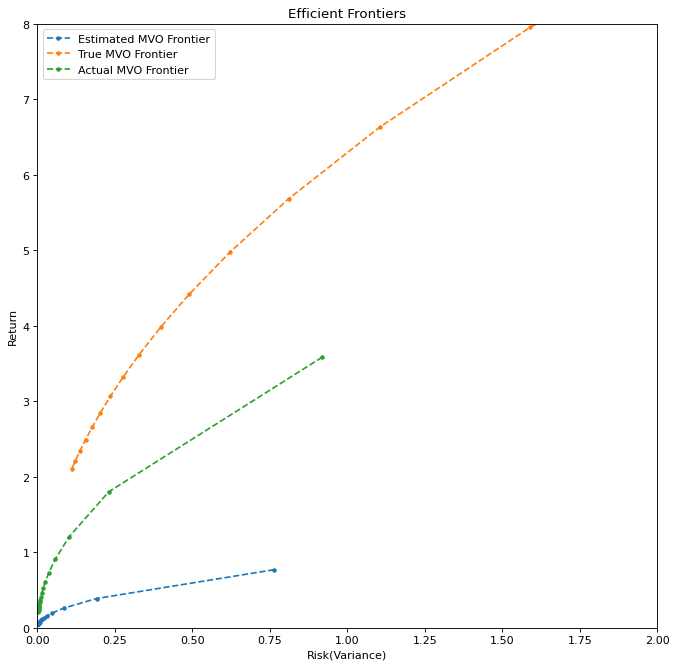

In [108]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(var_list_estimated_mvo,r_list_estimated_mvo, '.--', label="Estimated MVO Frontier")
plt.plot(var_list_true_mvo,r_list_true_mvo, '.--', label="True MVO Frontier")
plt.plot(var_list_actual_mvo,r_list_actual_mvo, '.--', label="Actual MVO Frontier")
plt.xlim((0,2))
plt.ylim((0,8))
plt.xlabel("Risk(Variance)")
plt.ylabel("Return")
plt.title("Efficient Frontiers")
plt.legend(loc= "best")
plt.show()

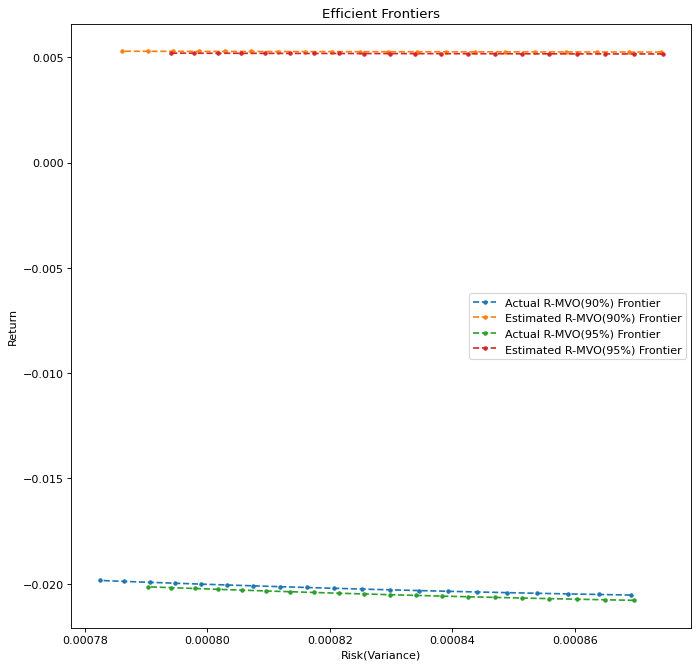

In [109]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(var_list_actual_rmvo_90,r_list_actual_rmvo_90, '.--', label="Actual R-MVO(90%) Frontier")
plt.plot(var_list_estimated_rmvo_90,r_list_estimated_rmvo_90, '.--', label="Estimated R-MVO(90%) Frontier")
plt.plot(var_list_actual_rmvo_95,r_list_actual_rmvo_95, '.--', label="Actual R-MVO(95%) Frontier")
plt.plot(var_list_estimated_rmvo_95,r_list_estimated_rmvo_95, '.--', label="Estimated R-MVO(95%) Frontier")
# plt.xlim((0,1))
# plt.ylim((0,5))
plt.xlabel("Risk(Variance)")
plt.ylabel("Return")
plt.title("Efficient Frontiers")
plt.legend(loc= "best")
plt.show()